## Performance Analysis of FC Barcelona - A decade of Evolution and Champions League challenges

### Project Overview & Motivation

- Over the past decade since their last UEFA Champions League win, FC Barcelona has transitioned from being one of the most dominant teams in Europe to facing recurring challenges in this competitions. As a fan of FC Barcelona, this project aims to analyze their performance trends from 2014 to 2024/2025, comparing key team metric across both domestic (La Liga) and other European competitions, to identify potential factor contributing to their poor performance in recent years, especially in continental scale.

### PART 1: FC BARCELONA PERFORMANCE TRENDS OVER TIME
- This part aims to show and analyze FC Barcelona's performace in both Domestic League and International Competition (the UEFA Champions League)

In [2]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# load needed dataset for analysis
df1 = pd.read_html('https://fbref.com/en/squads/206d90db/history/Barcelona-Stats-and-History#all_comps_fa_club_league', attrs={"id" : "comps_fa_club_league"})[0]
df2 = pd.read_html('https://fbref.com/en/squads/206d90db/history/Barcelona-Stats-and-History#all_comps_fa_club_league', attrs={"id" : "comps_intl_club_cup"})[0]
df3 = pd.read_csv('./fcb_deeper_stats.csv')
df4 = pd.read_html('https://www.fcbarcelonanoticias.com/en/fc-barcelona/fc-barcelona-laliga-salary-caps-historical-analysis_314748_102.html')[0]

# drop irrelevant columns and rows
df1 = df1.drop([0] + list(range(12, 38))).reset_index(drop=True)
df1 = df1.drop(['Country', 'Attendance', 'Top Team Scorer', 'Goalkeeper' , 'Notes'], axis=1)
indices_to_drop = df3[df3['Ball Situation'] == 'Set piece'].index
df3 = df3.drop(indices_to_drop).reset_index(drop=True)

# data cleaning
df1.rename(columns={"Comp" : "Domestic Comp", "LgRank" : "Domestic Rank", "MP" : "Domestic Match Played", 
                    "W" : "Domestic W", "D" : "Domestic D", "L" : "Domestic L", "GF" : "Total GF", 
                    "GA" : "Total GA", "GD" :"Domestic GD", "Pts" : "Domestic Pts"}, inplace=True)
df1["Season"] = df1["Season"].str.split("-").apply(lambda x: x[0][2:] + "/" + x[1][2:])
df4['Season'] = df4['Season'].str.split('-').apply(lambda x: x[0][2:] + "/" + x[1])
df1 = df1.sort_values("Season").reset_index(drop=True)
merged_df = pd.merge(df1, df3, on=['Season'], how='right')

# strip any space if any
merged_df.columns = merged_df.columns.str.strip()

# add necessary column
coach = {
    '14/15' : 'Luis Enrique',
    '15/16' : 'Luis Enrique',
    '16/17' : 'Luis Enrique',
    '17/18' : 'Ernesto Valverde',
    '18/19' : 'Ernesto Valverde',
    '19/20' : 'Ernesto Valverde',
    '20/21' : 'Quique Setien, Ronald Koeman',
    '21/22' : 'Sergi Barjuan, Xavi Hernandez',
    '22/23' : 'Xavi Hernandez', 
    '23/24' : 'Xavi Hernandez', 
    '24/25' : 'Hans-Dieter Flick'
}
merged_df['Coach'] = merged_df['Season'].map(coach)
merged_df

,Season,Squad,Domestic Comp,Domestic Rank,Domestic Match Played,Domestic W,Domestic D,Domestic L,Total GF,Total GA,Domestic GD,Domestic Pts,Ball Situation,Total Shots,GF,GA,xG,xGA,Coach
0,14/15,Barcelona,1. La Liga,1st,38,30,4,4,110,21,89,94,Open play,487,88,14,89.02,20.45,Luis Enrique
1,14/15,Barcelona,1. La Liga,1st,38,30,4,4,110,21,89,94,Corner kick,71,8,2,6.69,3.61,Luis Enrique
2,14/15,Barcelona,1. La Liga,1st,38,30,4,4,110,21,89,94,Free kick,43,3,0,3.07,1.22,Luis Enrique
3,15/16,Barcelona,1. La Liga,1st,38,29,4,5,112,29,83,91,Open play,454,84,25,88.79,29.41,Luis Enrique
4,15/16,Barcelona,1. La Liga,1st,38,29,4,5,112,29,83,91,Corner kick,56,9,3,8.75,3.98,Luis Enrique
5,15/16,Barcelona,1. La Liga,1st,38,29,4,5,112,29,83,91,Free kick,55,5,0,3.67,0.84,Luis Enrique
6,16/17,Barcelona,1. La Liga,2nd,38,28,6,4,116,37,79,90,Open play,493,90,25,75.63,27.46,Luis Enrique
7,16/17,Barcelona,1. La Liga,2nd,38,28,6,4,116,37,79,90,Corner kick,72,11,6,7.36,3.96,Luis Enrique
8,16/17,Barcelona,1. La Liga,2nd,38,28,6,4,116,37,79,90,Free kick,55,4,3,3.93,1.18,Luis Enrique
9,17/18,Barcelona,1. La Liga,1st,38,28,9,1,99,29,70,93,Open play,437,80,26,78.96,34.61,Ernesto Valverde


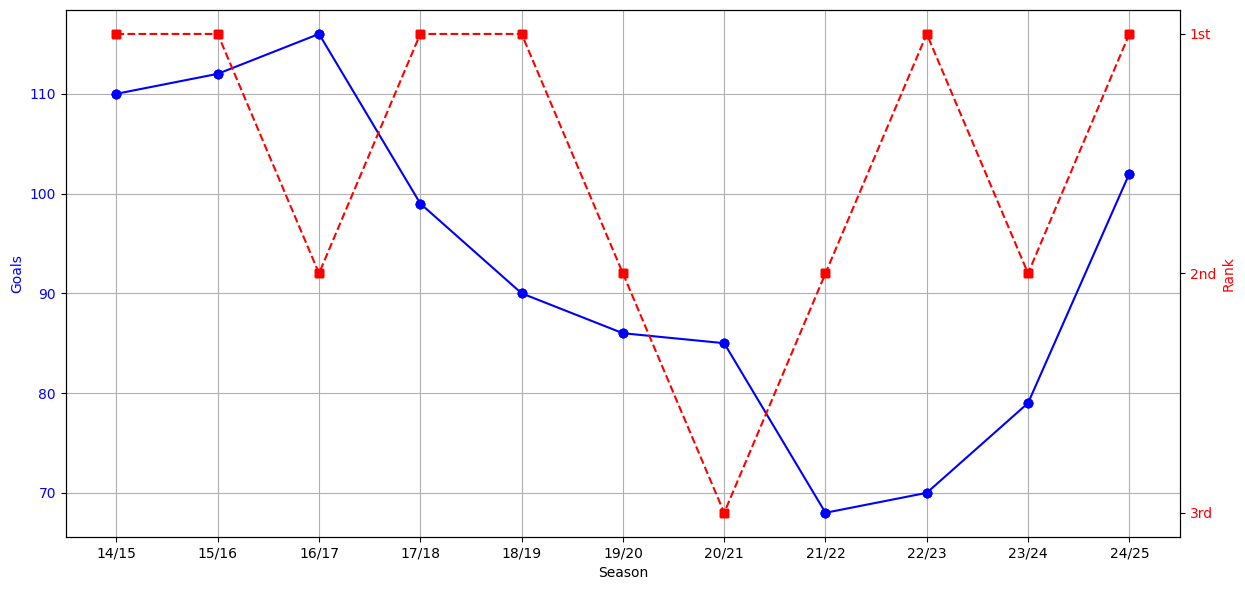

In [3]:
# stats visualize
# ========== PLOT 1: Goals & Rank ==========
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(merged_df["Season"], merged_df["Total GF"], marker='o', color='blue', label="Total Goals")
ax1.set_xlabel("Season")
ax1.set_ylabel("Goals", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)
plt.tight_layout()

ax2 = ax1.twinx()
ax2.plot(merged_df["Season"], merged_df["Domestic Rank"], marker='s', color='red', linestyle="--", label="Rank")
ax2.set_xlabel("Season")
ax2.set_ylabel("Rank", color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.invert_yaxis()


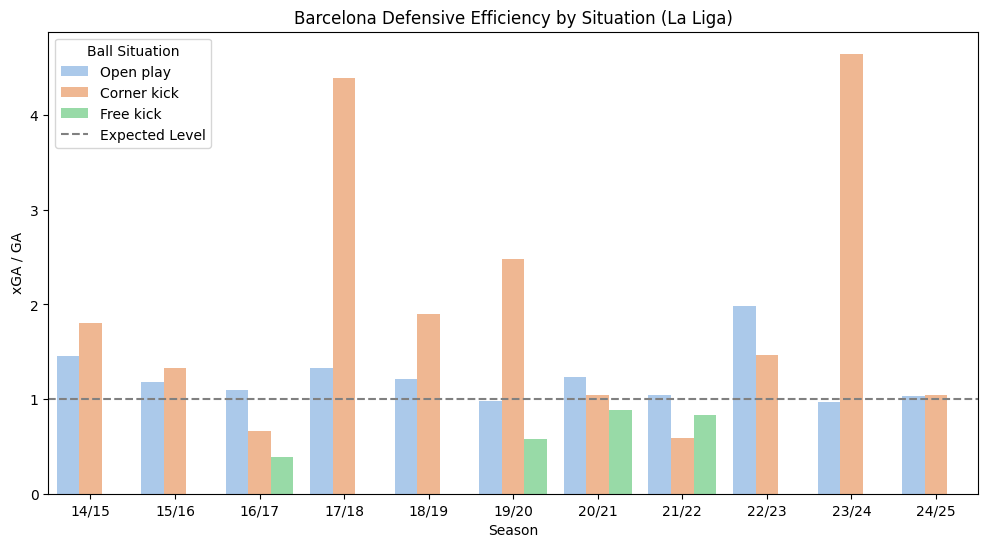

In [4]:
# visualize defensive efficiency 
merged_df['Defensive_eff'] = merged_df['xGA'] / merged_df['GA']
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Defensive_eff', hue='Ball Situation', data=merged_df, palette='pastel')
plt.axhline(1, color='gray', linestyle='--', label='Expected Level')
plt.title('Barcelona Defensive Efficiency by Situation (La Liga)')
plt.ylabel('xGA / GA')
plt.legend(title='Ball Situation')

#### Insights: Performance trend over the years based on goals and rank at the end of the season
- From the line charts, the blue line represents the number of goals that FC Barcelona (FCB) scored in each season over 10 years. The team was at its peak between the 14/15 and 16/17 seasons. However, 16/17 season also marked the beginning of the transition period, as FCB gradually faced challenges affecting their performance. This is evident as their goals-for (GF) declined drastically after this year and reached the lowest in 2022. This trend might suggest that the period from 2016 to 2022 was the most challenging phase for the club and they encountered lots of difficulties when performing on pitch. 
- The red line shows the team’s league rank at the end of each season. Interestingly, these 2 features are not always directly related. For example, in the season 20/21, FCB scored more goals than the following season but finished 3rd, whereas in 2022, despite a significant drop in goals, they achieved 2nd place. The subsequent 23/24 and 24/25 seasons showed a rebound, with a notable increase in goals scored, indicating that the team is rebuilding effectively. 
- This improvement suggests that while scoring more goals generally helps, other factors — such as defensive performance and consistency — also play a crucial role in match and league outcomes.

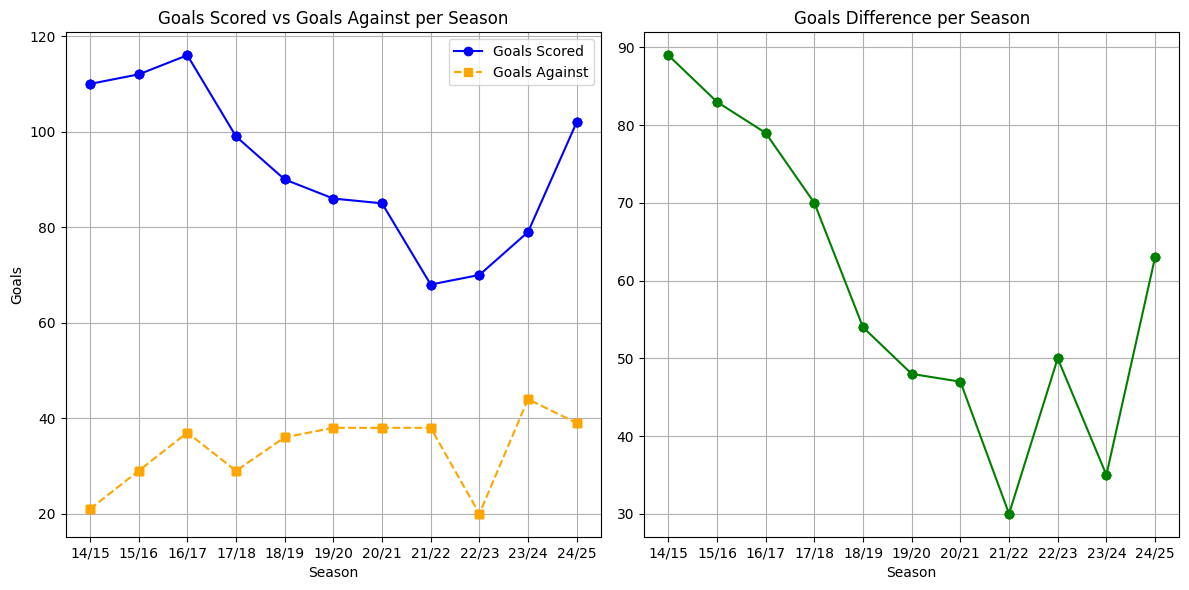

In [5]:
# ========== PLOT 2: Goals For & Goals Against ==========
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].plot(merged_df["Season"], merged_df["Total GF"], marker='o', color='blue', label="Goals Scored")
axes[0].plot(merged_df['Season'], merged_df['Total GA'], marker='s', linestyle="--", color='orange', label='Goals Against')

axes[0].set_title('Goals Scored vs Goals Against per Season')
axes[0].set_ylabel('Goals')
axes[0].set_xlabel('Season')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(merged_df['Season'], merged_df['Domestic GD'], marker='o', color='green', label='Goals Difference')
axes[1].set_title("Goals Difference per Season")
axes[1].set_xlabel("Season")
axes[1].grid(True)
plt.tight_layout()

#### INSIGHTS: FC Barcelona weakness in defense and finishing efficiency
- The line charts above illustrates goals distribution of FCB over the past 10 years. As shown by the green line, the goals difference (goals scored - goals against) decreased gradually after their peak season in 14/15. This indicates that although the team maintained relatively strong attacking outcomes, they simultaneously conceded more goals, revealing a recurring defensive weakness in the years following their dominance. 
- In particular, the 21/22 season stands out as a low point. During this season, FCB scored the least goals in the last decade but while conceding one of the highest totals (38, secondly to 44). As the result, the goals difference of this season dropped to the lowest level, highlighting that this was a period of significant unstability and  decline in overall performance
- The 22/23 season marked the turning point and the beginning of a rebuilding era. The goals difference significantly increase  while the goals against them reached the lowest in 10 years. This improvement coincided with a managerial change in the middle of the previous season when Xavi Hernandez came and replaced his colleague Sergi Barjuan as the manager of FCB, indicating a shift in tactical structure and defensive discipline. 
- However, the subsequent 2023/24 season raised questions about their consistency. Despite having the same coach, the team’s defensive performance deteriorated, with goals conceded reaching their highest level in a decade (44). This suggests that besides manager — other factors such as player dependency or even financial situation - may have influenced the team's perforamnce, which will be explored in-depth later.

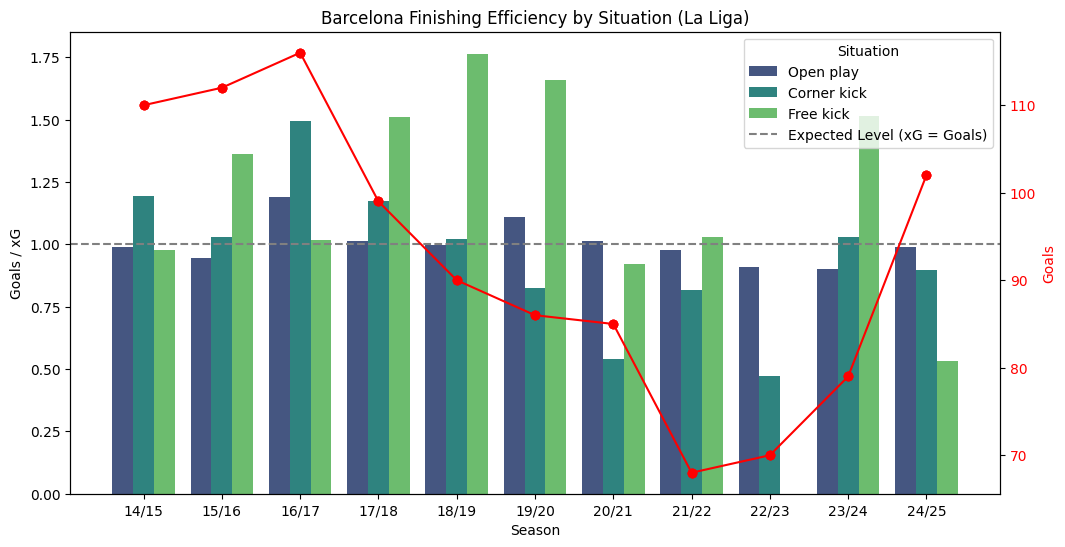

In [6]:
# visualize finishing efficiency
fig, ax1 = plt.subplots(figsize=(12, 6))
merged_df['Finishing_eff'] = merged_df['GF'] / merged_df['xG']
sns.barplot(x='Season', y='Finishing_eff', hue='Ball Situation', data=merged_df, palette='viridis')
ax1.axhline(1, color='gray', linestyle='--', label='Expected Level (xG = Goals)')
ax1.set_title('Barcelona Finishing Efficiency by Situation (La Liga)')
ax1.set_ylabel('Goals / xG')
ax1.legend(title='Situation')

ax2 = ax1.twinx()
ax2.plot(merged_df["Season"], merged_df["Total GF"], marker='o', color='red', label="Total Goals")
ax2.set_xlabel("Season")
ax2.set_ylabel("Goals", color='red')
ax2.tick_params(axis='y', labelcolor='red')

#### Insights: FC Barcelona finishing efficiency based on Expected-Goals (xG) and goals for (GF)
- The analysis of FC Barcelona finishing efficiency based on Goals-For (GF) and Expected Goals (xG) across different ball situation reveal dinstinct patterns in the team's attacking performance over the last 10 years. Efficiency is measured as the ratio of Goals-For (GF) to Expected Goals (xG), where a ratio above 1 indicates overperformance and below 1 indicates underperformance.
- **Open play:** Involving the play of live ball, usually contributes the majority of goals of any team. As it is shown in this bar plot, FCB does not always take good advantages of created chances. Between 2014 and 2019, FCB’s open play efficiency averaged 1.02 GF/xG, just slightly above the expected level. This essentialy means that while they created substantial number of chances and take many shots, fewer were converted into valid goals. After the season 19/20, their efficiency declined to an average of 0.95 GF/xG. In the 24/25 season, even when their Goals-For significantly increased, their efficiency remained below 1, highlighting that their conversion rate could still be improved.
- **Set pieces:** Corner kick and freekick are usually parts of set piece but analyzing them separately will provides better understanding and visualization of their performance trend. FCB showed strong execution in dead-ball scenarios between 2014 and 2019, especially in freekick with an average of 1.38 GF/xG. However, the finishing efficiency in set pieces went below expectation after the season 19/20 and fluctuated in the last few years. 
- **Overall trend:** Across all ball situations, FCB maintained strong attacking efficiency from 2014 to 2019, with most GF/xG ratios were at or above 1. From 2020 onward, they started showing their underperformance as the efficiency declined in all scenarios, and most fell below the expected level. This variability in finishing efficiency may have contributed to inconsistent match outcomes, as missed opportunities allow opponents to capitalize. Highlighting single-season events, such as coaching changes, or other influential factors, such as player transfers, player dependency, or financial situation, will provides additional context for these fluctuations.
- **Key Insights**: 

,Season,Intl Comp,Stage Reached,UCL Match Played,UCL W,UCL D,UCL L,UCL GF,UCL GA,UCL GD,UCL Pts
0,14/15,1. Champions Lg,W,13,11,0,2,31,11,20,33
1,15/16,1. Champions Lg,QF,10,7,2,1,22,8,14,23
2,16/17,1. Champions Lg,QF,10,6,1,3,26,12,14,19
3,17/18,1. Champions Lg,QF,10,6,3,1,17,6,11,21
4,18/19,1. Champions Lg,SF,12,8,3,1,26,10,16,27
5,19/20,1. Champions Lg,QF,9,5,3,1,15,14,1,18
6,20/21,1. Champions Lg,R16,8,5,1,2,18,10,8,16
7,21/22,2. Europa Lg,QF,6,2,3,1,10,8,2,9
8,21/22,1. Champions Lg,GR,6,2,1,3,2,9,-7,7
9,22/23,2. Europa Lg,KO,2,0,1,1,3,4,-1,1


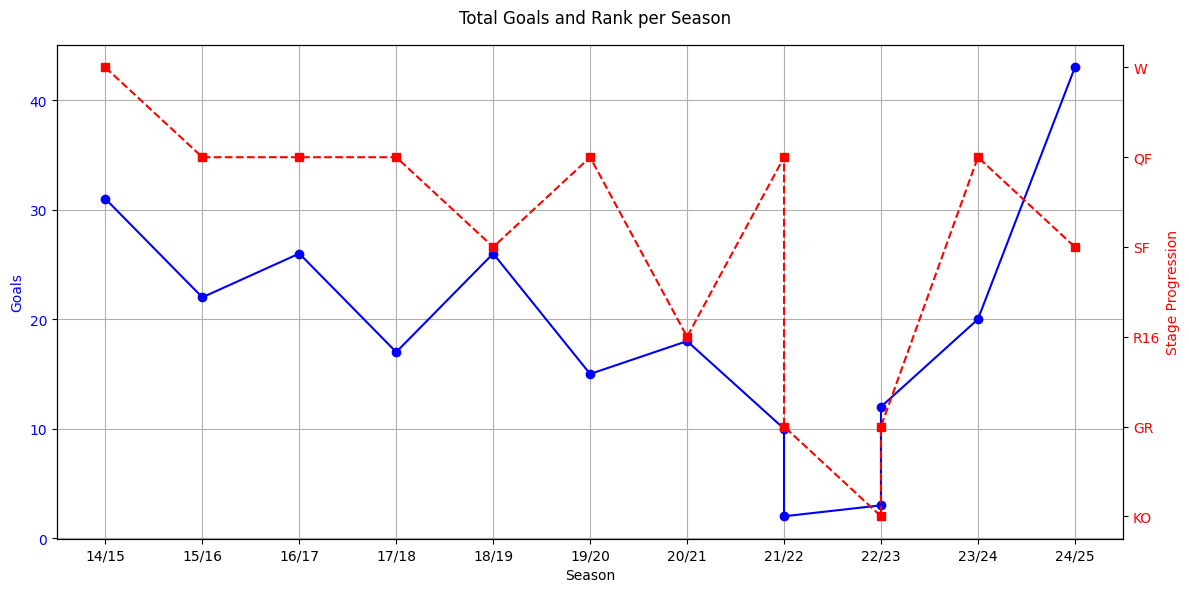

In [7]:

# clean dataset
df2 = df2.drop([0] + list(range(14, 38))).reset_index(drop=True)
df2 = df2.drop(['Attendance', 'Top Team Scorer', 'Goalkeeper', 'Notes', 'Squad'], axis=1)

# cleaning and transforming data for later visualization
df2.rename(columns={"Comp" : "Intl Comp", "LgRank" : "Stage Reached", "MP" : "UCL Match Played", 
                    "W" : "UCL W", "D" : "UCL D", "L" : "UCL L", "GF" : "UCL GF", 
                    "GA" : "UCL GA", "GD" :"UCL GD", "Pts" : "UCL Pts"}, inplace=True)
df2 = df2.astype({'UCL Match Played' : 'int', 'UCL W' : 'int', 'UCL D' : 'int', 'UCL L' : 'int', 'UCL GF' : 'int', 
                  'UCL GA' : 'int', 'UCL GD' : 'int', 'UCL Pts' : 'int'})
df2['Season'] = df2['Season'].str.split("-").apply(lambda x: x[0][2:] + "/" + x[1][2:])
df2 = df2.sort_values("Season").reset_index(drop=True)

# stats visualize
fig, ax1 = plt.subplots(figsize=(12,6))

# ========== PLOT 3: Goals and Rank ==========
ax1.plot(df2["Season"], df2["UCL GF"], marker='o', color='blue', label="Goals")
ax1.set_xlabel("Season")
ax1.set_ylabel("Goals", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# plot rank on another y axis
ax2 = ax1.twinx()  
ax2.plot(df2["Season"], df2["Stage Reached"], marker='s', color='red', linestyle='--', label="Rank")
ax2.set_ylabel("Stage Progression", color='red')
ax2.invert_yaxis()  
ax2.tick_params(axis='y', labelcolor='red')

# add title and legend
fig.suptitle("Total Goals and Rank per Season")
fig.tight_layout()

df2


#### INSIGHTS
- This line chart shows the summary stats of FCB in the UEFA Champions League (UCL), which is considered the most pretigous club-level title in football,  over 14 years from 2010 - 2024. As we can see the latest time that they won this competition was 10 years ago, and since then there was a negative fluctuation in their performance. They were eliminated in Quarter-Finals (QF) for 3 consecutuve years after becoming a champion in the 14/15 season. They got into Semi-Finals in 18/19 but the results were even worse the following years, paticularly in 21/22 and 22/23. If we look more closely here, we will see there are two points plotted in the line in these 2 seasons. This happened because FCB was demoted to the UEFA Europa League (UEL) after failing the group stage of the UCL, and again they got elimninated in the QF (of the UEL) in 21/22 and could not even pass the Knock-Out stages (Round of 32 of the UEL) in 22/23. In the next 2 seasons, although they were able to come back and play at the UCL, they still failed at Quarter and Semi Finals.
- There was a key point here is that, it has been 10 years since the last time they won this reputable title, and they lost 8 times out of 10 at the Knock-Out games (QF and SF) despite how well they performed in the previous stages. If we look at the 24/25 season, they scored extremely many goals, many more compared to the season that they last won, and still only ended reaching the Semi-Finals. 
- 